## 설명
- 감정 -> 긍정1,중립0,부정-1로 전환
- X(t) = 가격
- Y(t) = 심리
- N(t) = 글 수
- S_index1 = 감정s * 글 수 num

In [1]:
pip install pyecharts

     |████████████████████████████████| 135 kB 4.1 MB/s 
     |████████████████████████████████| 130 kB 41.5 MB/s 


In [2]:
pip install chart_studio

     |████████████████████████████████| 64 kB 1.8 MB/s 


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import operator
import seaborn as sns
from datetime import datetime
from matplotlib import font_manager, rc

from pyecharts.charts import Bar
from pyecharts.charts import Line

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
!ls -l '/content/drive/MyDrive/Colab Notebooks/datasets/stock_market/XRP_sentiment.csv'
!ls -l '/content/drive/MyDrive/Colab Notebooks/datasets/stock_market/XRP.csv'

-rw------- 1 root root 11495 Nov 17 12:13 '/content/drive/MyDrive/Colab Notebooks/datasets/stock_market/XRP_sentiment.csv'
-rw------- 1 root root 50009 Nov 17 07:15 '/content/drive/MyDrive/Colab Notebooks/datasets/stock_market/XRP.csv'


In [8]:
DF = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/stock_market/XRP_sentiment.csv')
DF_price = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/stock_market/XRP.csv')

In [9]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345 entries, 0 to 344
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       345 non-null    object 
 1   coin_name  345 non-null    object 
 2   num        345 non-null    int64  
 3   s          345 non-null    float64
 4   lang       345 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 13.6+ KB


In [47]:
print(DF.head())
print(DF.tail())

         date coin_name  num         s lang
0  2016-05-31       xrp  900  0.466667  kor
1  2020-12-09       xrp   15  0.000000  kor
2  2020-12-10       xrp   35  0.000000  kor
3  2020-12-11       xrp   79  0.000000  kor
4  2020-12-12       xrp   75  0.000000  kor
           date coin_name  num         s lang
340  2021-11-13       xrp   33  0.787879  kor
341  2021-11-14       xrp   30  0.933333  kor
342  2021-11-15       xrp   25  0.920000  kor
343  2021-11-16       xrp   39  0.897436  kor
344  2021-11-17       xrp   13  0.384615  kor


In [133]:
# DF.groupby('coin_name')['coin_name'].count()

coin_name
ada     253
bch     227
btc     298
doge    164
eos      41
eth     346
omg     526
snt     742
xrp      65
Name: coin_name, dtype: int64

In [134]:
# DF_XRP = DF[DF['coin_name'] == 'xrp']

In [10]:
DF_XRP = DF

In [11]:
DF_XRP = DF_XRP.reset_index(drop=True)

In [12]:
DF_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      682 non-null    object 
 1   Price     682 non-null    float64
 2   Open      682 non-null    float64
 3   High      682 non-null    float64
 4   Low       682 non-null    float64
 5   Vol.      682 non-null    object 
 6   Change %  682 non-null    object 
dtypes: float64(4), object(3)
memory usage: 37.4+ KB


In [13]:
DF_price.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"Nov 12, 2021",1.18836,1.21489,1.23284,1.15537,617.77M,-2.19%
1,"Nov 11, 2021",1.21499,1.19227,1.25419,1.17713,647.85M,1.91%
2,"Nov 10, 2021",1.19223,1.25619,1.34634,1.13594,1.26B,-5.08%
3,"Nov 09, 2021",1.25608,1.28185,1.28767,1.23000,622.97M,-2.01%
4,"Nov 08, 2021",1.28185,1.21795,1.29468,1.21795,788.09M,5.25%


In [14]:
DF_price['Price'][178]

1.59055

In [140]:
#리플가격은 이미 낮아서 작업 필요 없음
# DF_price['Price'][178] = DF_price['Price'][178].replace(',','')

AttributeError: ignored

In [141]:
# DF_price['Price'][178]

1.59055

In [18]:
# for i in range(len(DF_price['Price'])):
#   DF_price['Price'][i] = DF_price['Price'][i].replace(',','')



In [19]:
# DF_price['Price'][178]

'1090.47'

In [20]:
# DF_price['Price'][178] = pd.to_numeric(DF_price['Price'][178], downcast = 'float')

In [20]:
type(DF_price['Price'][179])

numpy.float64

In [21]:
for i in range(len(DF_price['Price'])):
  DF_price['Price'][i] = pd.to_numeric(DF_price['Price'][i], downcast = 'float')

In [22]:
DF_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      682 non-null    object 
 1   Price     682 non-null    float64
 2   Open      682 non-null    float64
 3   High      682 non-null    float64
 4   Low       682 non-null    float64
 5   Vol.      682 non-null    object 
 6   Change %  682 non-null    object 
dtypes: float64(4), object(3)
memory usage: 37.4+ KB


In [23]:
date_time_obj = datetime.strptime(DF_price['Date'][0], '%b %d, %Y')
date_time_obj

datetime.datetime(2021, 11, 12, 0, 0)

In [24]:
date_time_obj.strftime("%Y-%m-%d")

'2021-11-12'

In [25]:
DF_price.iloc[0]

Date        Nov 12, 2021
Price            1.18836
Open             1.21489
High             1.23284
Low              1.15537
Vol.             617.77M
Change %          -2.19%
Name: 0, dtype: object

In [26]:
A = []
for i in range(len(DF_price)):
  date_time_obj = datetime.strptime(DF_price['Date'][i], '%b %d, %Y')
  a = date_time_obj.strftime("%Y-%m-%d")
  A.append(a)

In [27]:
B = []
for i in range(len(DF_price)):
  x = DF_price['Price'][i]
  date_time_obj = datetime.strptime(DF_price['Date'][i], '%b %d, %Y')
  a = date_time_obj.strftime("%Y-%m-%d")
  Y = [a,x]
  B.append(Y)
DF_B = pd.DataFrame(B)
DF_B.columns = ['date','price']

In [ ]:
# for i in DF_B['date']:
#   for j in DF_bch['date']:
#     if i == j:
#       print('매치', i, j)


In [28]:
C = []
for i in range(len(DF_B)):
  for j in range(len(DF_XRP)):
    if DF_B['date'][i] == DF_XRP['date'][j]:
      # print('매치', i, j , DF_B['date'][i], DF_XRP['date'][j], DF_B['price'][i], DF_XRP['s'][j])
      a = DF_B['date'][i]
      b = DF_B['price'][i]
      c = DF_XRP['s'][j]
      d = DF_XRP['num'][j]
      Y = [a,b,c,d]
      C.append(Y)
      
DF_XRP_F = pd.DataFrame(C)
DF_XRP_F.columns = ['date','price','s','num']

In [29]:
DF_XRP_F

,date,price,s,num
0,2021-11-12,1.18836,1.081081,37
1,2021-11-11,1.21499,1.000000,32
2,2021-11-10,1.19223,0.642857,28
3,2021-11-09,1.25608,0.909091,22
4,2021-11-08,1.28185,1.000000,24
...,...,...,...,...
334,2020-12-13,0.51416,0.000000,42
335,2020-12-12,0.50589,0.000000,75
336,2020-12-11,0.54787,0.000000,79
337,2020-12-10,0.57136,0.000000,35


In [30]:
DF_XRP_F['s'] = -1*(DF_XRP_F['s']-1)

In [31]:
DF_XRP_F

,date,price,s,num
0,2021-11-12,1.18836,-0.081081,37
1,2021-11-11,1.21499,-0.000000,32
2,2021-11-10,1.19223,0.357143,28
3,2021-11-09,1.25608,0.090909,22
4,2021-11-08,1.28185,-0.000000,24
...,...,...,...,...
334,2020-12-13,0.51416,1.000000,42
335,2020-12-12,0.50589,1.000000,75
336,2020-12-11,0.54787,1.000000,79
337,2020-12-10,0.57136,1.000000,35


In [50]:
DF_XRP_F['date'][210]
#기준으로 잘라야함(이 데이터 셋기준 AI 레이블이 작동안함)

'2021-04-16'

In [52]:
DF_XRP_F = DF_XRP_F[:210]

In [53]:
DF_XRP_F1 =DF_XRP_F.set_index("date")

## 3) 시각화

### 1) 감정s만 일단

In [33]:
# DF_bch_F.sort_values(by = 'date', axis = 0,ascending=True)
# # DF_bch_F = DF_bch_F.reset_index(drop=True)

In [34]:
# DF_bch_F = DF_bch_F.reset_index( inplace=True)

In [33]:
Y_values = DF_XRP_F['s']

In [34]:
X_values = DF_XRP_F['price']

In [35]:
t_values = DF_XRP_F['date']	

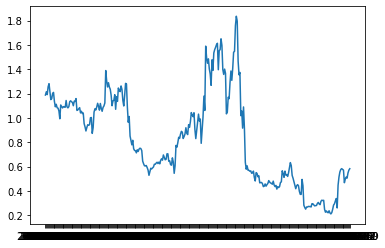

In [36]:
ax = plt.plot(t_values,X_values)
plt.show()

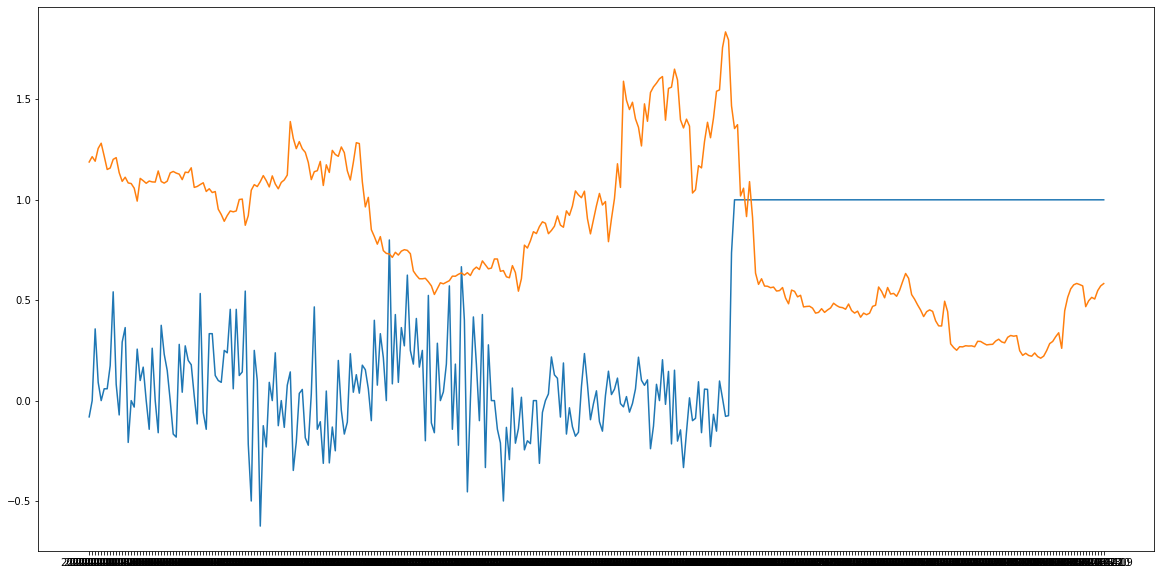

In [38]:
plt.figure(figsize=(20,10))

plt.plot(t_values, Y_values)	
plt.plot(t_values, X_values)

plt.show()

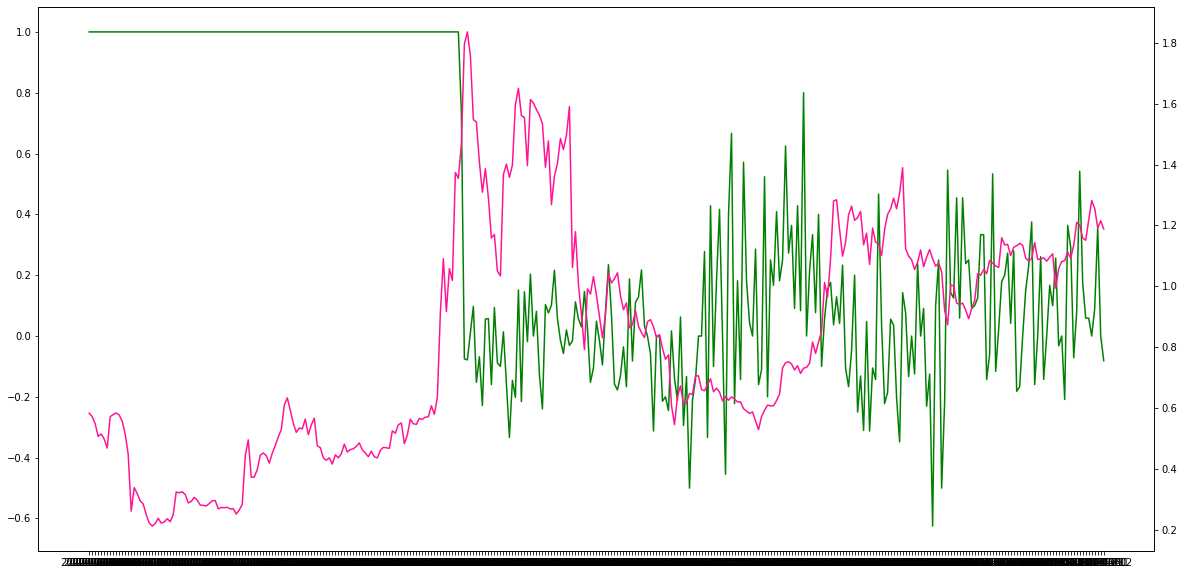

In [39]:
plt.rcParams['figure.figsize'] = (20, 10)
fig, ax1 = plt.subplots()
ax1.plot(t_values, Y_values , color = 'green')

ax2 = ax1.twinx()
ax2.invert_xaxis()
ax2.plot(t_values, X_values , color = 'deeppink')

plt.show()

In [40]:
import plotly.offline as plyo
import cufflinks

In [41]:
# 아래그래프 그리기기 전 스케일 전환
DF_XRP_F1_iplot = DF_XRP_F1[['price','s']]

In [42]:
plyo.iplot(DF_XRP_F1_iplot.iplot(asFigure=True))

In [43]:
DF_XRP_x = DF_XRP_F1_iplot

In [44]:
#글 수 20개 이상만 그래프 반영하기
for i in range(len(DF_XRP_F1)):
  if DF_XRP_F1['num'][i] <= 19 :
    DF_XRP_x['s'][i] = 0
    # print('yes')
  # else :
  #   # print('no')


In [45]:
plyo.iplot(DF_XRP_x.iplot(asFigure=True))

In [49]:
# x_values = DF_bch_Fx2['date']	
# y_values = DF_bch_Fx2['s']
# z_values = DF_bch_Fx2['price']

# plt.rcParams['figure.figsize'] = (20, 10)
# fig, ax1 = plt.subplots()
# ax1.plot(x_values, y_values , color = 'green')

# ax2 = ax1.twinx()
# ax2.invert_xaxis()
# ax2.plot(x_values, z_values , color = 'deeppink')

# plt.show()

## 4) 데이터 프레임 작업


- s의 변화율과, 변화율의 변화율이 필요
- Y(t) = 감정평균
- N(t) = 글 수
- S_index1 = Y(t)*N(t)

In [54]:
DF_XRP_F

,date,price,s,num
0,2021-11-12,1.18836,-0.081081,37
1,2021-11-11,1.21499,-0.000000,32
2,2021-11-10,1.19223,0.357143,28
3,2021-11-09,1.25608,0.090909,22
4,2021-11-08,1.28185,-0.000000,24
...,...,...,...,...
205,2021-04-21,1.29046,0.057143,105
206,2021-04-20,1.38614,0.055944,143
207,2021-04-19,1.30918,-0.228571,105
208,2021-04-18,1.40794,-0.068323,161


In [55]:
DF_XRP_F['S_index1'] = DF_XRP_F['s']*DF_XRP_F['num']

In [56]:
DF_XRP_F

,date,price,s,num,S_index1
0,2021-11-12,1.18836,-0.081081,37,-3.0
1,2021-11-11,1.21499,-0.000000,32,-0.0
2,2021-11-10,1.19223,0.357143,28,10.0
3,2021-11-09,1.25608,0.090909,22,2.0
4,2021-11-08,1.28185,-0.000000,24,-0.0
...,...,...,...,...,...
205,2021-04-21,1.29046,0.057143,105,6.0
206,2021-04-20,1.38614,0.055944,143,8.0
207,2021-04-19,1.30918,-0.228571,105,-24.0
208,2021-04-18,1.40794,-0.068323,161,-11.0


In [57]:
# 1차 도함수 Y는 sns변수 t 시간에 따라  dt= 하루
DF_XRP_F['D(1)Y(t)'] = -1*(DF_XRP_F['s'].diff().shift(-1))/1

In [58]:
# 2차 도함수 Y는 sns변수 t 시간에 따라  dt= 하루
DF_XRP_F['D(2)Y(t)'] = -1*(DF_XRP_F['D(1)Y(t)'].diff().shift(-1))/1

In [59]:
DF_XRP_F

,date,price,s,num,S_index1,D(1)Y(t),D(2)Y(t)
0,2021-11-12,1.18836,-0.081081,37,-3.0,-0.081081,0.276062
1,2021-11-11,1.21499,-0.000000,32,-0.0,-0.357143,-0.623377
2,2021-11-10,1.19223,0.357143,28,10.0,0.266234,0.175325
3,2021-11-09,1.25608,0.090909,22,2.0,0.090909,0.149733
4,2021-11-08,1.28185,-0.000000,24,-0.0,-0.058824,-0.058824
...,...,...,...,...,...,...,...
205,2021-04-21,1.29046,0.057143,105,6.0,0.001199,-0.283317
206,2021-04-20,1.38614,0.055944,143,8.0,0.284515,0.444764
207,2021-04-19,1.30918,-0.228571,105,-24.0,-0.160248,-0.244099
208,2021-04-18,1.40794,-0.068323,161,-11.0,0.083851,NaN


## 6) 수식
- Y(t) = 감정평균
- N(t) = 글 수
- S_index1 = Y(t)*N(t)
- S_index2 = (aY(t)+bD(1)Y(t)+cD(2)Y(t)) * N(t)
- a,b,c를 데이터로 구해야 하는데 일단 1/3씩


In [60]:
a=1/3
b=1/3
c=1/3
DF_XRP_F['S_index2'] = (a*DF_XRP_F['s']+b*DF_XRP_F['D(1)Y(t)']+c*DF_XRP_F['D(2)Y(t)'])*DF_XRP_F['num']

In [61]:
DF_XRP_F

,date,price,s,num,S_index1,D(1)Y(t),D(2)Y(t),S_index2
0,2021-11-12,1.18836,-0.081081,37,-3.0,-0.081081,0.276062,1.404762
1,2021-11-11,1.21499,-0.000000,32,-0.0,-0.357143,-0.623377,-10.458874
2,2021-11-10,1.19223,0.357143,28,10.0,0.266234,0.175325,7.454545
3,2021-11-09,1.25608,0.090909,22,2.0,0.090909,0.149733,2.431373
4,2021-11-08,1.28185,-0.000000,24,-0.0,-0.058824,-0.058824,-0.941176
...,...,...,...,...,...,...,...,...
205,2021-04-21,1.29046,0.057143,105,6.0,0.001199,-0.283317,-7.874126
206,2021-04-20,1.38614,0.055944,143,8.0,0.284515,0.444764,37.428986
207,2021-04-19,1.30918,-0.228571,105,-24.0,-0.160248,-0.244099,-22.152174
208,2021-04-18,1.40794,-0.068323,161,-11.0,0.083851,NaN,NaN


### 2) correlation ceefficient

In [62]:
# 그날기준 종가
corr = DF_XRP_F.corr(method='pearson')
print(corr)

             price         s       num  S_index1  D(1)Y(t)  D(2)Y(t)  S_index2
price     1.000000 -0.158110  0.529716 -0.086366  0.005053  0.013800  0.017508
s        -0.158110  1.000000 -0.134731  0.682351  0.665841  0.395846  0.409887
num       0.529716 -0.134731  1.000000  0.011414  0.017014  0.009833  0.126811
S_index1 -0.086366  0.682351  0.011414  1.000000  0.426983  0.246499  0.673898
D(1)Y(t)  0.005053  0.665841  0.017014  0.426983  1.000000  0.870526  0.635970
D(2)Y(t)  0.013800  0.395846  0.009833  0.246499  0.870526  1.000000  0.626392
S_index2  0.017508  0.409887  0.126811  0.673898  0.635970  0.626392  1.000000


## 6) 수식 -확장
- Y(t) = 감정평균
- N(t) = 계시글수
- S_index3 = (aY(t)+bD(1)Y(t)+cD(2)Y(t)) * (dN(t)+eD(1)N(t)+fD(2)N(t))

- a,b,c,d,e,f를 데이터로 구해야 하는데 일단 1/3씩

In [63]:
# 1차 도함수
DF_XRP_F['D(1)N(t)'] = -1*(DF_XRP_F['num'].diff().shift(-1))/1


In [64]:
# 2차 도함수
DF_XRP_F['D(2)N(t)'] = -1*(DF_XRP_F['D(1)N(t)'].diff().shift(-1))/1

In [65]:
DF_XRP_F

,date,price,s,num,S_index1,D(1)Y(t),D(2)Y(t),S_index2,D(1)N(t),D(2)N(t)
0,2021-11-12,1.18836,-0.081081,37,-3.0,-0.081081,0.276062,1.404762,5.0,1.0
1,2021-11-11,1.21499,-0.000000,32,-0.0,-0.357143,-0.623377,-10.458874,4.0,-2.0
2,2021-11-10,1.19223,0.357143,28,10.0,0.266234,0.175325,7.454545,6.0,8.0
3,2021-11-09,1.25608,0.090909,22,2.0,0.090909,0.149733,2.431373,-2.0,-9.0
4,2021-11-08,1.28185,-0.000000,24,-0.0,-0.058824,-0.058824,-0.941176,7.0,7.0
...,...,...,...,...,...,...,...,...,...,...
205,2021-04-21,1.29046,0.057143,105,6.0,0.001199,-0.283317,-7.874126,-38.0,-76.0
206,2021-04-20,1.38614,0.055944,143,8.0,0.284515,0.444764,37.428986,38.0,94.0
207,2021-04-19,1.30918,-0.228571,105,-24.0,-0.160248,-0.244099,-22.152174,-56.0,-125.0
208,2021-04-18,1.40794,-0.068323,161,-11.0,0.083851,NaN,NaN,69.0,NaN


In [66]:
a=1/3
b=1/3
c=1/3
d=1/3
e=1/3
f=1/3
DF_XRP_F['S_index3'] = (a*DF_XRP_F['s']+b*DF_XRP_F['D(1)Y(t)']+c*DF_XRP_F['D(2)Y(t)'])*(d*DF_XRP_F['num']+e*DF_XRP_F['D(1)N(t)']+f*DF_XRP_F['D(2)N(t)'])

In [67]:
DF_XRP_F

,date,price,s,num,S_index1,D(1)Y(t),D(2)Y(t),S_index2,D(1)N(t),D(2)N(t),S_index3
0,2021-11-12,1.18836,-0.081081,37,-3.0,-0.081081,0.276062,1.404762,5.0,1.0,0.544187
1,2021-11-11,1.21499,-0.000000,32,-0.0,-0.357143,-0.623377,-10.458874,4.0,-2.0,-3.704185
2,2021-11-10,1.19223,0.357143,28,10.0,0.266234,0.175325,7.454545,6.0,8.0,3.727273
3,2021-11-09,1.25608,0.090909,22,2.0,0.090909,0.149733,2.431373,-2.0,-9.0,0.405229
4,2021-11-08,1.28185,-0.000000,24,-0.0,-0.058824,-0.058824,-0.941176,7.0,7.0,-0.496732
...,...,...,...,...,...,...,...,...,...,...,...
205,2021-04-21,1.29046,0.057143,105,6.0,0.001199,-0.283317,-7.874126,-38.0,-76.0,0.224975
206,2021-04-20,1.38614,0.055944,143,8.0,0.284515,0.444764,37.428986,38.0,94.0,23.992939
207,2021-04-19,1.30918,-0.228571,105,-24.0,-0.160248,-0.244099,-22.152174,-56.0,-125.0,5.344651
208,2021-04-18,1.40794,-0.068323,161,-11.0,0.083851,NaN,NaN,69.0,NaN,NaN


In [68]:
corr = DF_XRP_F.corr(method='pearson')
print(corr)

             price         s       num  ...  D(1)N(t)  D(2)N(t)  S_index3
price     1.000000 -0.158110  0.529716  ...  0.048762 -0.005778 -0.001744
s        -0.158110  1.000000 -0.134731  ...  0.013962 -0.034262  0.167388
num       0.529716 -0.134731  1.000000  ...  0.281706  0.059712  0.116230
S_index1 -0.086366  0.682351  0.011414  ...  0.024248 -0.105620  0.412711
D(1)Y(t)  0.005053  0.665841  0.017014  ...  0.031228 -0.012186  0.414299
D(2)Y(t)  0.013800  0.395846  0.009833  ...  0.037384  0.017992  0.434592
S_index2  0.017508  0.409887  0.126811  ...  0.127517  0.005408  0.713004
D(1)N(t)  0.048762  0.013962  0.281706  ...  1.000000  0.787397 -0.160494
D(2)N(t) -0.005778 -0.034262  0.059712  ...  0.787397  1.000000 -0.164959
S_index3 -0.001744  0.167388  0.116230  ... -0.160494 -0.164959  1.000000

[10 rows x 10 columns]


## 실제로 하루 다음을 추론

In [69]:
DF_XRP_Fx = DF_XRP_F

In [78]:
DF_XRP_Fx['price'] = (DF_XRP_Fx['price'].shift(1))

In [79]:
DF_XRP_Fx

,date,price,s,num,S_index1,D(1)Y(t),D(2)Y(t),S_index2,D(1)N(t),D(2)N(t),S_index3
0,2021-11-12,NaN,-0.081081,37,-3.0,-0.081081,0.276062,1.404762,5.0,1.0,0.544187
1,2021-11-11,NaN,-0.000000,32,-0.0,-0.357143,-0.623377,-10.458874,4.0,-2.0,-3.704185
2,2021-11-10,NaN,0.357143,28,10.0,0.266234,0.175325,7.454545,6.0,8.0,3.727273
3,2021-11-09,1.18836,0.090909,22,2.0,0.090909,0.149733,2.431373,-2.0,-9.0,0.405229
4,2021-11-08,1.21499,-0.000000,24,-0.0,-0.058824,-0.058824,-0.941176,7.0,7.0,-0.496732
...,...,...,...,...,...,...,...,...,...,...,...
205,2021-04-21,1.05015,0.057143,105,6.0,0.001199,-0.283317,-7.874126,-38.0,-76.0,0.224975
206,2021-04-20,1.17023,0.055944,143,8.0,0.284515,0.444764,37.428986,38.0,94.0,23.992939
207,2021-04-19,1.15886,-0.228571,105,-24.0,-0.160248,-0.244099,-22.152174,-56.0,-125.0,5.344651
208,2021-04-18,1.29046,-0.068323,161,-11.0,0.083851,NaN,NaN,69.0,NaN,NaN


In [80]:
corr = DF_XRP_Fx.corr(method='pearson')
print(corr)

             price         s       num  ...  D(1)N(t)  D(2)N(t)  S_index3
price     1.000000 -0.107807  0.447231  ...  0.011635 -0.012386  0.028099
s        -0.107807  1.000000 -0.134731  ...  0.013962 -0.034262  0.167388
num       0.447231 -0.134731  1.000000  ...  0.281706  0.059712  0.116230
S_index1 -0.024093  0.682351  0.011414  ...  0.024248 -0.105620  0.412711
D(1)Y(t) -0.014870  0.665841  0.017014  ...  0.031228 -0.012186  0.414299
D(2)Y(t) -0.011098  0.395846  0.009833  ...  0.037384  0.017992  0.434592
S_index2  0.007867  0.409887  0.126811  ...  0.127517  0.005408  0.713004
D(1)N(t)  0.011635  0.013962  0.281706  ...  1.000000  0.787397 -0.160494
D(2)N(t) -0.012386 -0.034262  0.059712  ...  0.787397  1.000000 -0.164959
S_index3  0.028099  0.167388  0.116230  ... -0.160494 -0.164959  1.000000

[10 rows x 10 columns]


In [74]:
DF_XRP_Fx.head(20)

,date,price,s,num,S_index1,D(1)Y(t),D(2)Y(t),S_index2,D(1)N(t),D(2)N(t),S_index3
0,2021-11-12,NaN,-0.081081,37,-3.0,-0.081081,0.276062,1.404762,5.0,1.0,0.544187
1,2021-11-11,1.18836,-0.000000,32,-0.0,-0.357143,-0.623377,-10.458874,4.0,-2.0,-3.704185
2,2021-11-10,1.21499,0.357143,28,10.0,0.266234,0.175325,7.454545,6.0,8.0,3.727273
3,2021-11-09,1.19223,0.090909,22,2.0,0.090909,0.149733,2.431373,-2.0,-9.0,0.405229
4,2021-11-08,1.25608,-0.000000,24,-0.0,-0.058824,-0.058824,-0.941176,7.0,7.0,-0.496732
5,2021-11-07,1.28185,0.058824,17,1.0,-0.000000,0.115090,0.985507,-0.0,6.0,0.444444
6,2021-11-06,1.21790,0.058824,17,1.0,-0.115090,0.252664,1.112923,-6.0,-5.0,0.130932
7,2021-11-05,1.15120,0.173913,23,4.0,-0.367754,-0.828339,-7.836712,-1.0,12.0,-3.861568
8,2021-11-04,1.15831,0.541667,24,13.0,0.460586,0.308076,10.482625,-13.0,-22.0,-1.601512
9,2021-11-03,1.20147,0.081081,37,3.0,0.152510,0.515605,9.240079,9.0,5.0,4.245442


## 7)지수 시각화

- 시각화 shifft없이 확인

### 1) 가격과 N(t)

In [81]:
t_values = DF_XRP_F['date']
X_values = DF_XRP_F['price']
I_values = DF_XRP_F['S_index1']

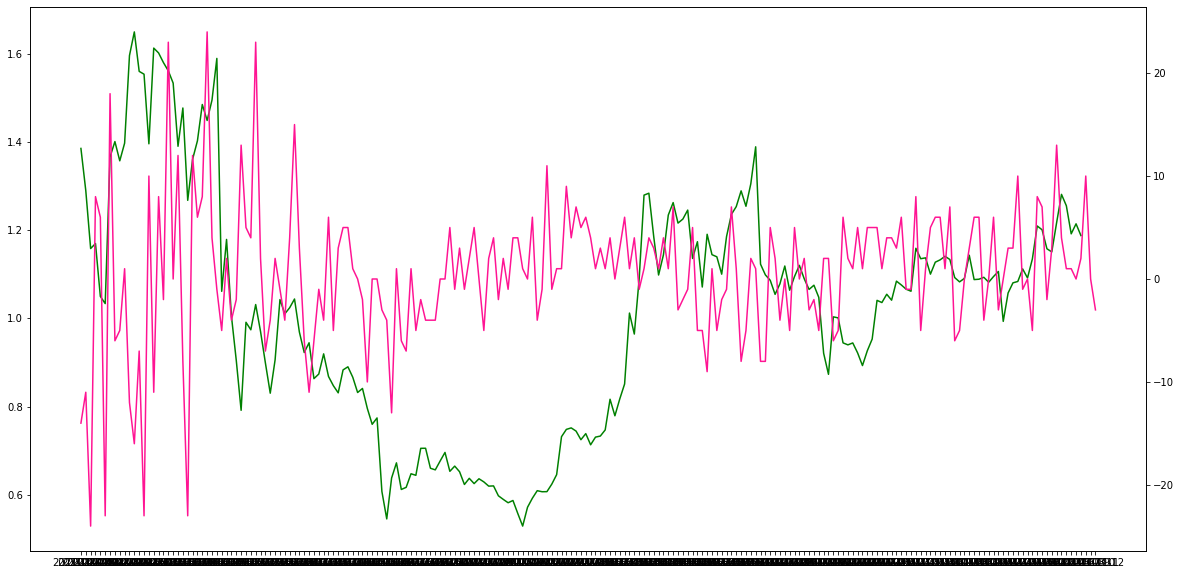

In [82]:
plt.rcParams['figure.figsize'] = (20, 10)
fig, ax1 = plt.subplots()
ax1.plot(t_values, X_values , color = 'green')

ax2 = ax1.twinx()
ax2.invert_xaxis()
ax2.plot(t_values, I_values , color = 'deeppink')

plt.show()

In [95]:
DF_XRP_Fx = DF_XRP_F[['date','num','price']]

In [96]:
DF_XRP_Fx_iplot = DF_XRP_Fx.set_index("date")

In [97]:
# 크기 조정 코드
DF_XRP_Fx_iplot['num'] = DF_XRP_Fx_iplot['num']/60

In [98]:
plyo.iplot(DF_XRP_Fx_iplot.iplot(asFigure=True))

### 2) 가격과 Index1

In [99]:
DF_XRP_Fx = DF_XRP_F[['date','S_index1','price']]

In [100]:
DF_XRP_Fx_iplot = DF_XRP_Fx.set_index("date")

In [103]:
# 크기 조정 코드
DF_XRP_Fx_iplot['S_index1'] = DF_XRP_Fx_iplot['S_index1']/15

In [104]:
plyo.iplot(DF_XRP_Fx_iplot.iplot(asFigure=True))

### 3) 가격과 Index2

In [105]:
DF_XRP_Fx = DF_XRP_F[['date','S_index2','price']]

In [106]:
DF_XRP_Fx_iplot = DF_XRP_Fx.set_index("date")

In [107]:
# 크기 조정 코드
DF_XRP_Fx_iplot['S_index2'] = DF_XRP_Fx_iplot['S_index2']/15

In [108]:
plyo.iplot(DF_XRP_Fx_iplot.iplot(asFigure=True))

### 4) 가격과 Index3

In [109]:
DF_XRP_Fx = DF_XRP_F[['date','S_index3','price']]

In [110]:
DF_XRP_Fx_iplot = DF_XRP_Fx.set_index("date")

In [111]:
# 크기 조정 코드
DF_XRP_Fx_iplot['S_index3'] = DF_XRP_Fx_iplot['S_index3']/15

In [112]:
plyo.iplot(DF_XRP_Fx_iplot.iplot(asFigure=True))

In [121]:
for i in range(len(DF_bch_F1)):
  if DF_bch_F1['S_index'][i] <= 700 :
    DF_bch_F1['S_index'][i] = 0
    # print('yes')
  # else :
  #   # print('no')
